@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

# Census Income Project


@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

### Problem Statement:

    This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Extracting dataset and saving dataset in a variable

data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
#Displaying the dataset

data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
#Checking our dataset rows and columns

data.shape

(32560, 15)

    Dataset contains 32560 rows and 15 columns

## Statistical Summary

In [5]:
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

- we can see that there are no NaN values in our dataset


In [6]:
data['Workclass'].unique(),data['Occupation'].unique(),data['Native_country'].unique()

(array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
        ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
        ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
        ' Priv-house-serv'], dtype=object),
 array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
        ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
        ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
        ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
        ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
        ' Trinada

- But we found in our dataset that there is a unique value " ?" in the categorical column

In [7]:
#Let's find which column has this unique value ' ?' and the percentage of this missing value

round((data.isin([' ?']).sum()/data.shape[0])*100,2).astype(str)+'%'

Age                0.0%
Workclass         5.64%
Fnlwgt             0.0%
Education          0.0%
Education_num      0.0%
Marital_status     0.0%
Occupation        5.66%
Relationship       0.0%
Race               0.0%
Sex                0.0%
Capital_gain       0.0%
Capital_loss       0.0%
Hours_per_week     0.0%
Native_country    1.79%
Income             0.0%
dtype: object

#### Observation:
    - Columns: "Workclass", "Occupation", "Native_country", has ' ?' has this unnamed value, 
    - We would need to impute/manipulate/replace these values

In [8]:
#Let's replace the unique value with NaN

data = data.replace(' ?',np.NaN)

In [9]:
#Let's check number of NaN values present in each column

data.isna().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

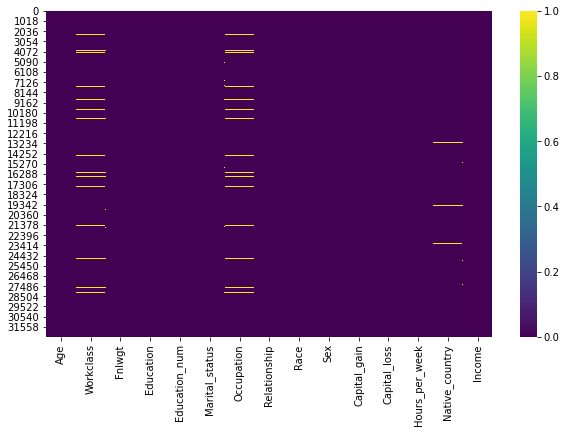

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='viridis')
plt.show()

Let's replace these NaN values with mode value of each column

In [11]:
columns_with_nan = ["Workclass", "Occupation", "Native_country"]

In [12]:
for col in columns_with_nan:
    data[col].fillna(data[col].mode()[0], inplace=True)

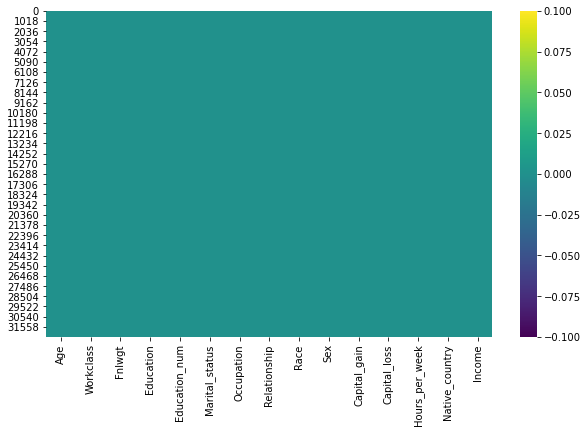

In [13]:
#Plot null values to check if any
plt.figure(figsize=(10,6))
sns.heatmap(data.isna(),cmap='viridis')
plt.show()


    There is no more null values in our datatset. So, let us proceed further

In [14]:
data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Explratory Data Analysis (EDA)

### Univariate Analysis

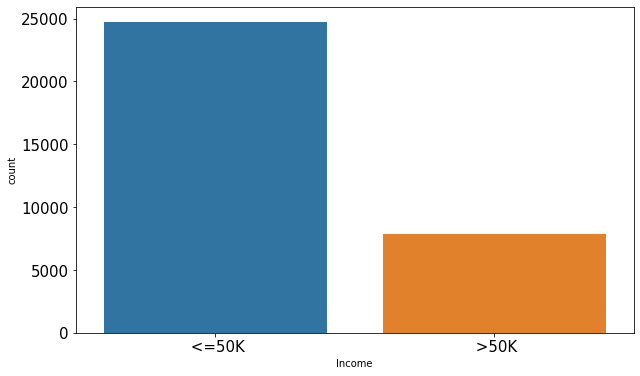

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In [16]:
#Target Column "Income"
plt.figure(figsize = (10,6),facecolor='White')
sns.countplot(x='Income', data = data)
plt.tick_params(labelsize=15)
plt.show()


data['Income'].value_counts()

#### Observation:
    - The highest number of population are earning less than 50k "<=50K"
    - And less number of population are earning ">50K"
    Our label column is Imbanced and we would need to balance it by using "Under sampling/Over Sampling method"

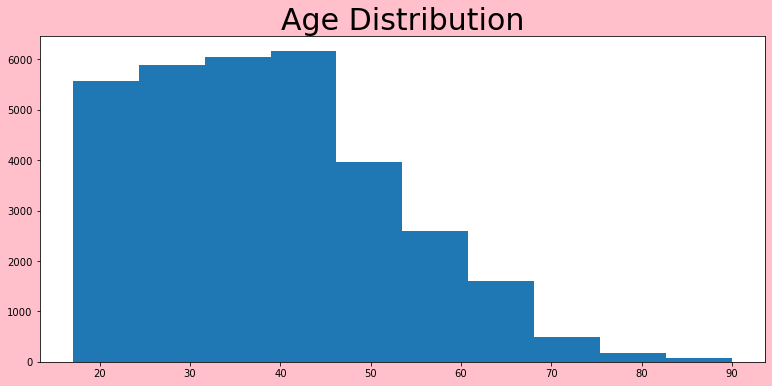

In [17]:
#Cloumn "Age"

plt.figure(figsize = (13,6),facecolor='pink')
plt.hist(data['Age'])
plt.title("Age Distribution", fontsize = 30)

plt.show()

#### Observation:
    Highest number of population works around the age range (20 - 40)
    After this age group, we see reduction in the population working
    

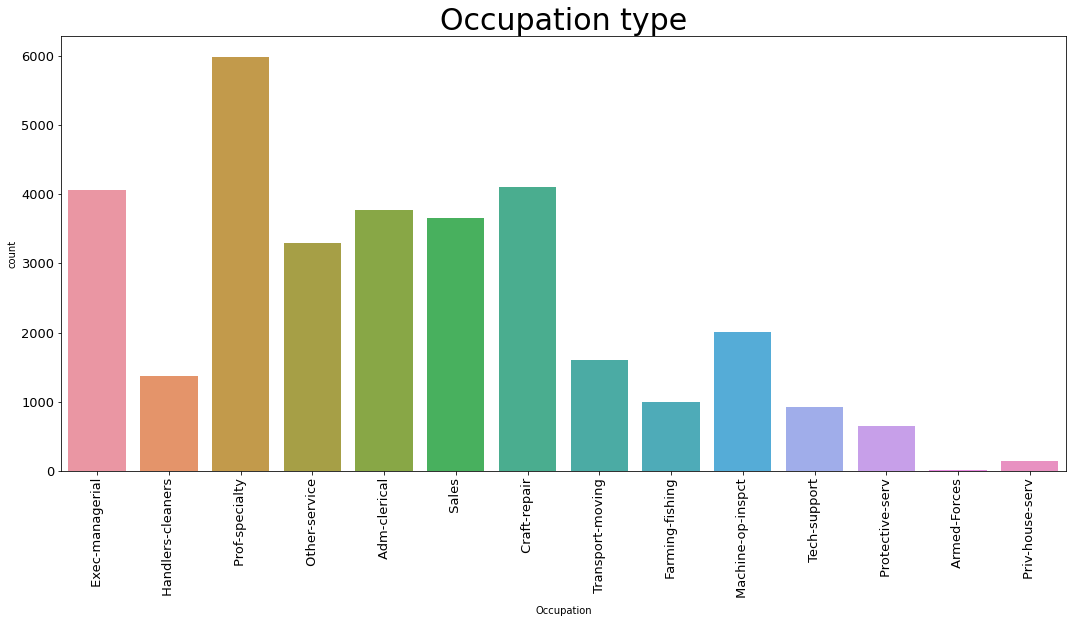

In [18]:
#Cloumn "Occupation Type"

plt.figure(figsize = (18,8))
ax=sns.countplot(x="Occupation", data=data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tick_params(labelsize=13)
plt.title("Occupation type", fontsize = 30)
plt.show()

#### Observation:
    Prof-specialty - more number of population are engaged in this occupation
    Exec-managerial - also has a good populationworking under this occupation type
    Armed-Forces - Least population
    

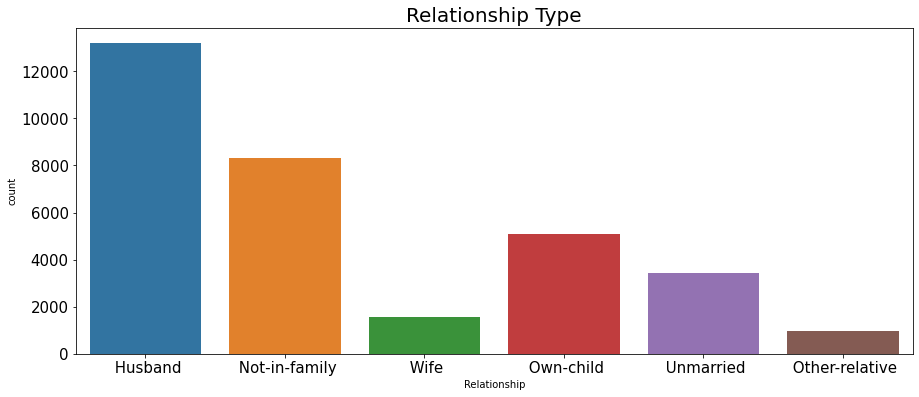

In [19]:
#Cloumn "Relationship"

plt.figure(figsize = (15,6))
sns.countplot(x="Relationship", data=data)
plt.title("Relationship Type", fontsize = 20)
plt.tick_params(labelsize=15)
plt.show()

#### Observation:
    We observe that the percentage of working Husband for the family is more when compared to the percentage of Working Wife
    The percentage of population with no family has also a good employment rate

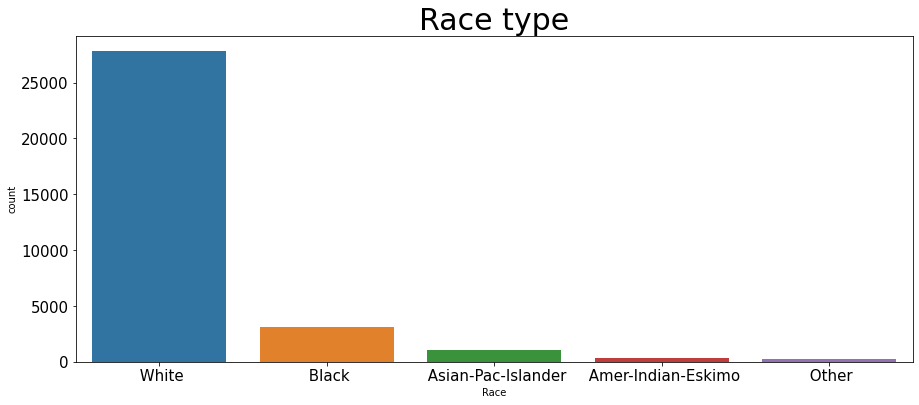

In [20]:
#Cloumn "Race type"

plt.figure(figsize = (15,6))
sns.countplot(x="Race", data=data)
plt.title("Race type", fontsize = 30)
plt.tick_params(labelsize=15)
plt.show()

#### Observation:
    The population of Race "White" has the more working rate when compared to other race type with a drastic range

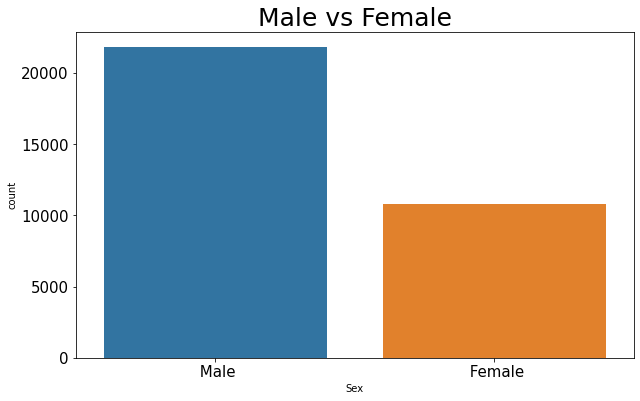

In [21]:
#Column "Sex"

plt.figure(figsize = (10,6))
sns.countplot(x="Sex", data=data)
plt.title("Male vs Female", fontsize = 25)
plt.tick_params(labelsize=15)
plt.show()

#### Observation:
    As per 'Sex ratio'  -  Number of counts are more for Female when compared to Female

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

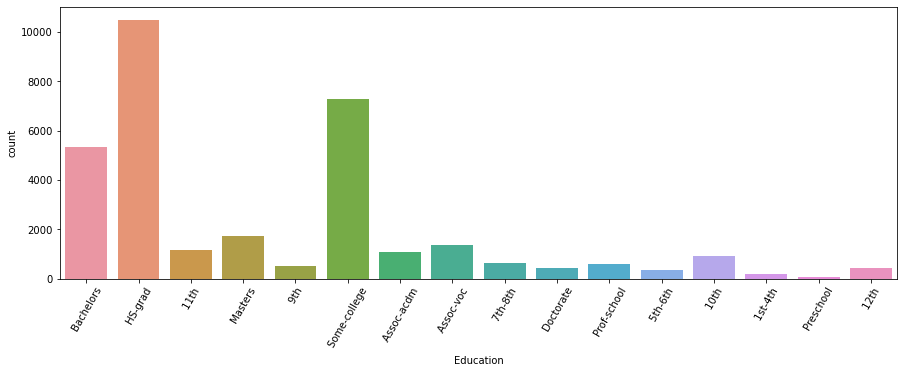

In [22]:
#Column Education

plt.figure(figsize = [15,5])
sns.countplot(x='Education',data=data)
plt.xticks(rotation=60)

data['Education'].value_counts()

9     10501
10     7291
13     5354
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: Education_num, dtype: int64

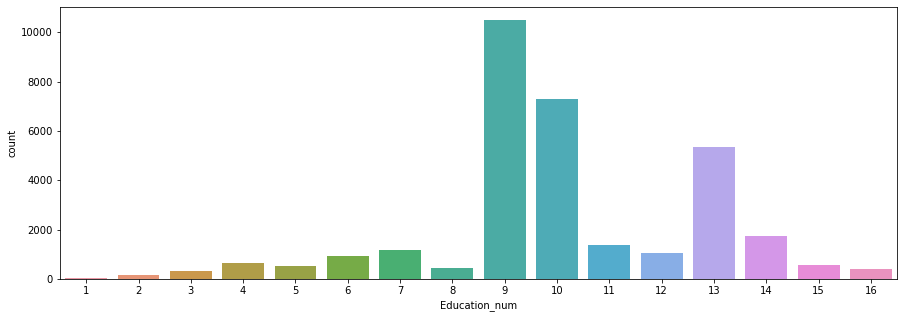

In [23]:
#Column Education_num

plt.figure(figsize = [15,5])

sns.countplot(x='Education_num',data=data)
plt.xticks()

data['Education_num'].value_counts()

#### Observation:
    By comparing both the columns: "Education_num" and "Education"
    - We see that data counts are one and the same for both of these column data
    - We would just need to name columns unique data according to their education grade and name the range "1 to 16"
    - Then, our data for both columns will look exactly same
    Hence, we can drop any one column, let's drop the column: "Education_num" later

### Bivariate Analysis

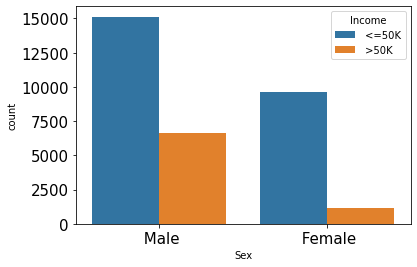

In [24]:

sns.countplot(data['Sex'],hue=data['Income'])
plt.tick_params(labelsize=15)


#### Observation:
    Percentage of Males are earning over ">50K" are high when compared to Females earning over ">50K"

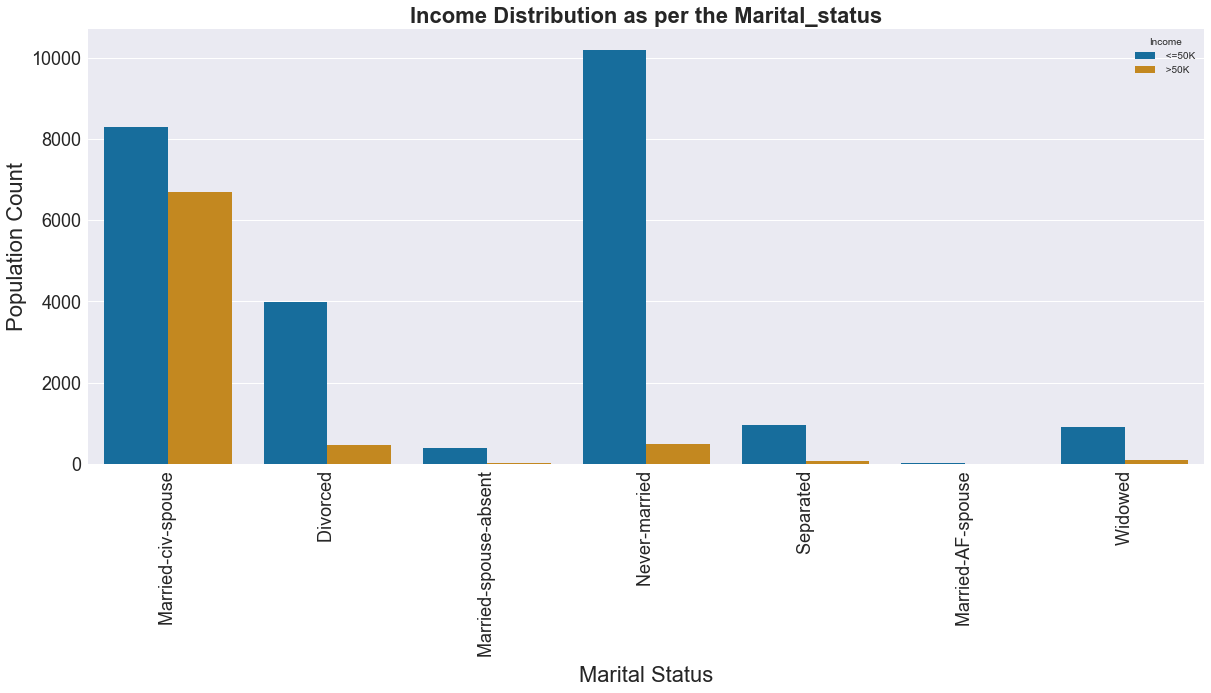

In [25]:
#Income Distribution as per the "Marital_status"

plt.style.use('seaborn')
plt.figure(figsize=(20, 8))
sns.countplot(data['Marital_status'],hue=data['Income'], palette='colorblind')
plt.title('Income Distribution as per the Marital_status', fontdict={'fontsize': 22, 'fontweight': 'bold'})
plt.xlabel('Marital Status', fontdict={'fontsize': 22})
plt.ylabel('Population Count', fontdict={'fontsize': 22})
plt.xticks(rotation=90)
plt.tick_params(labelsize=18)
plt.show()

### Observation:
We observe that,
   
    "Married-civ-spouse" - works with an income over ">50K"
    "Never-married" - more population who are not married, do with less in come "<=50 K"

<AxesSubplot:xlabel='Income', ylabel='Capital_gain'>

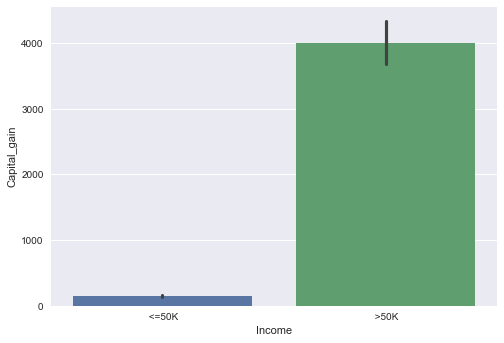

In [26]:
sns.barplot(x = 'Income', y = 'Capital_gain', data = data)

#### Observation:
    - Population who earn over ">50K" leads to more Capital gain, when compared to the population who earn "<=50K"
    
    "The high income leads to more Capital gain"

<AxesSubplot:xlabel='Income', ylabel='Capital_loss'>

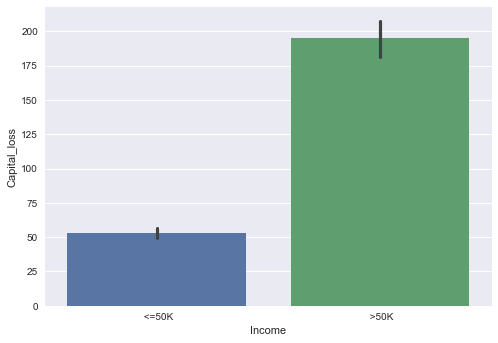

In [27]:
sns.barplot(x = 'Income', y = 'Capital_loss', data = data)


#### Observation:
    - Population who earn over ">50K" also leads to more "Capital Loss, when compared to the population who earn "<=50K"
    
    "The high income leads to more Capital loss"

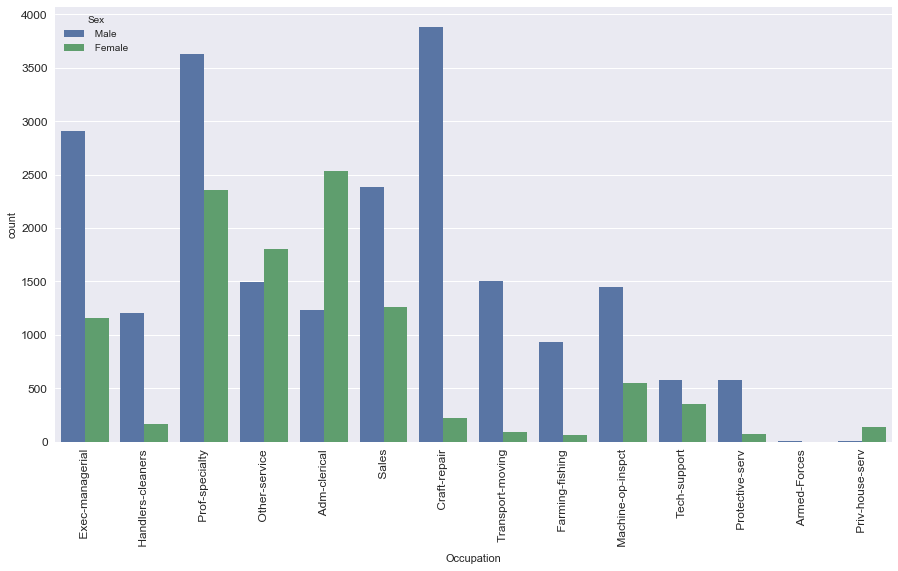

In [28]:
plt.figure(figsize=(15,8))
ax = sns.countplot(data['Occupation'], hue=data['Sex'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tick_params(labelsize=12)
plt.show()

#### Observation:
We observe that, 
    
    In most of the occupdation type there are more number of Male population working when compared to Female population
    In our dataset, the highest working population are engaged with "Craft-repair" occupdation type

### Multivariate Analysis

<AxesSubplot:xlabel='Income', ylabel='Hours_per_week'>

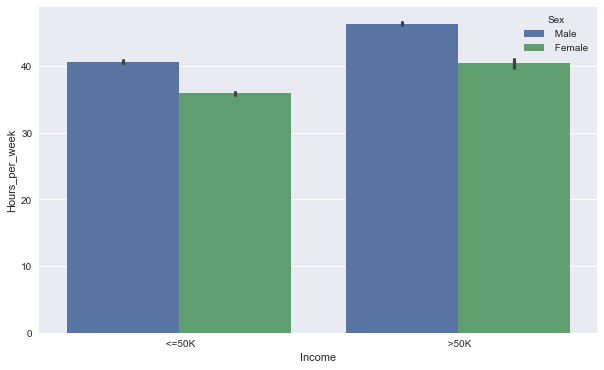

In [29]:
plt.figure(figsize = (10,6))
sns.barplot(x=data['Income'],y=data['Hours_per_week'],hue=data['Sex'])

#### Observation:
    For earnings over ">50K", Male and Female both need to work for longer hours in a week
    But Count of hours worked by Male to earn both "<=50K and >50K" is more

#### Correlation
Using Heatmap

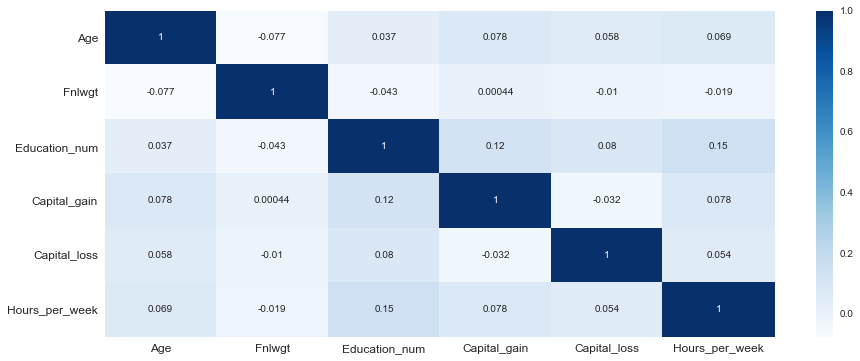

In [30]:
#Let's plot heatmap

plt.figure(figsize=(15,6))
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.tick_params(labelsize=12)

plt.show()

In [31]:
data.corr()  #To check the correlation table

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


#### Observation:
    'Fnlwgt' and 'Capital_gain' has least correlation with value "0.000437"
    'Education_num' has more correlation in our dataset with  'Hours_per_week'and 'Capital_gain'

## Data Preprocessing

In [32]:
#As discussed let us drop the "Education_num" as this column is similar with "Education" column data

data = data.drop(columns = ['Education_num'])

### Removing Outliers

Let's apply some techniques t remove the outliers

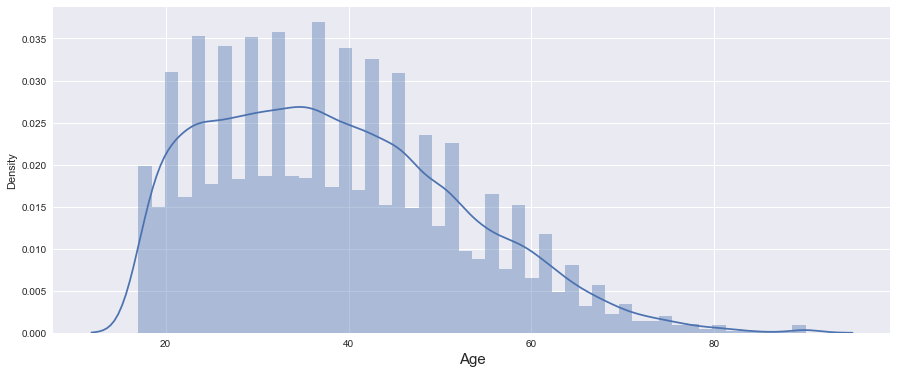

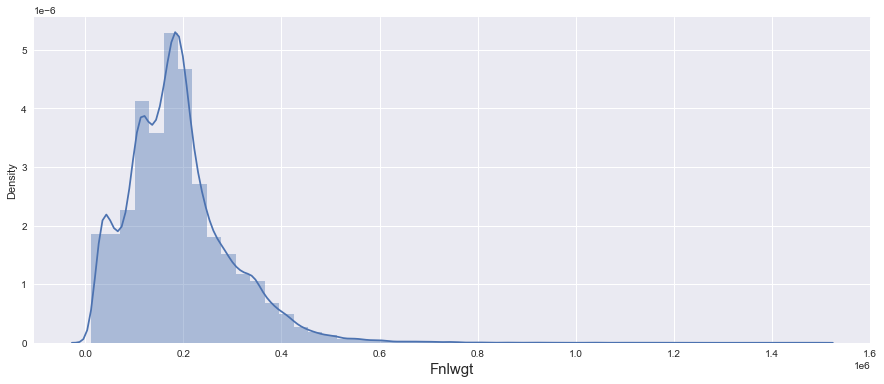

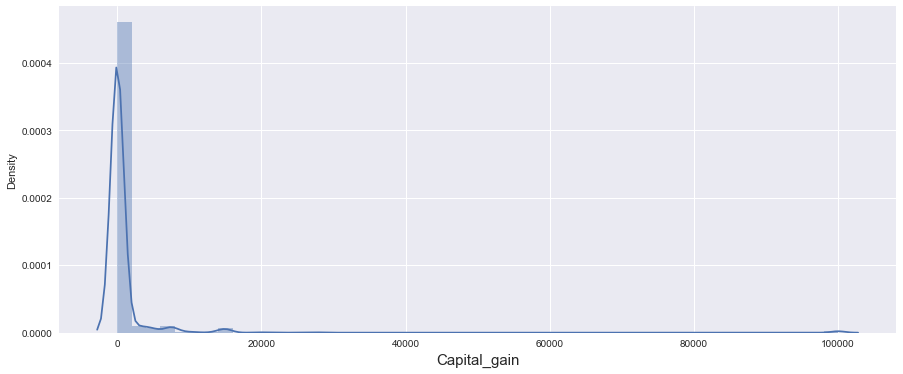

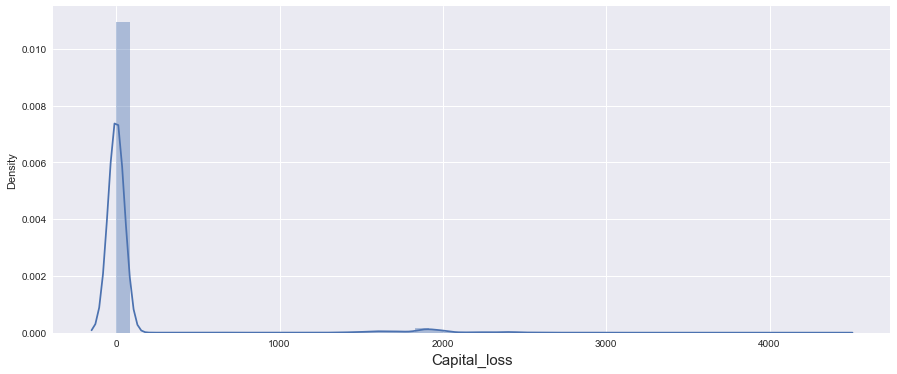

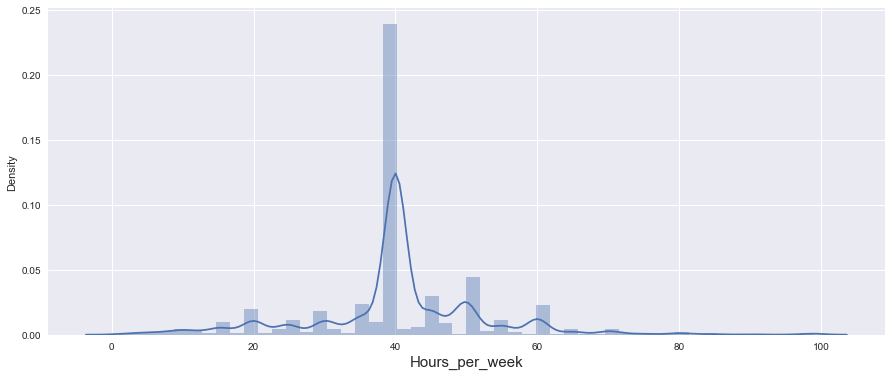

In [33]:

for i in data.columns:
    
    if data[i].dtype!='object':
        plt.figure(figsize=[15,6])
        sns.distplot(data[i])
        plt.xlabel(i,fontsize=15)
    plt.show()

In [34]:
features = ['Age', 'Fnlwgt','Capital_gain', 'Capital_gain','Hours_per_week']  #columns with outliers


#### Applying IQR Method

In [35]:
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data[features] < (Q1-1.5*IQR)) | (data[features]> (Q3 + 1.5*Q3))).any(axis = 1)]

In [36]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new1.shape[0])/data.shape[0])*100)


Shape - Before and After:

Shape Before         : (32560, 14)
Shape After          : (24491, 14)
Percentage Loss      : 24.78194103194103


#### Applying z-score Method

In [37]:
from scipy.stats import zscore  #importing zscore from library

z=np.abs(zscore(data[features]))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [38]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",((data.shape[0]-data_new2.shape[0])/data.shape[0])*100)

Shape - Before and After:

Shape Before         : (32560, 14)
Shape After          : (31461, 14)
Percentage Loss      : 3.3753071253071254


#### Observation:
    Percentage Loss      : 24.78194103194103 %
    Percentage Loss      : 3.3753071253071254 %    
- Percentage of data loss is less after applying zscore technique. So, let's proceed with zscore method

In [39]:
data_new = data_new2.copy()  #let's copy our new data in another variaible

## Skewness

Let's check for the skewness in our dataset

In [40]:
#Skewness before applying the outliers technique

data.skew()

Age                0.558738
Fnlwgt             1.446972
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

In [41]:
# Before removing skewness

data_new.skew()

Age               0.475267
Fnlwgt            0.632635
Capital_gain      5.087653
Capital_loss      4.544726
Hours_per_week   -0.345858
dtype: float64

Skewness is more in  the columns: 

    "Capital_gain", "Capital_loss" and "Fnlwgt"

#### Applying PowerTransformation to remove the skewness

In [42]:

from sklearn.preprocessing import PowerTransformer #importing the library

scaler = PowerTransformer(method='yeo-johnson')

data_new['Capital_gain'] = scaler.fit_transform(data_new['Capital_gain'].values.reshape(-1,1))
data_new['Fnlwgt'] = scaler.fit_transform(data_new['Fnlwgt'].values.reshape(-1,1))
data_new['Capital_loss'] = scaler.fit_transform(data_new['Capital_loss'].values.reshape(-1,1))

In [43]:
data_new.skew()

Age               0.475267
Fnlwgt           -0.034708
Capital_gain      3.176483
Capital_loss      4.277175
Hours_per_week   -0.345858
dtype: float64

- We have removed the maximum skewness from our dataset
- We are left with a few more skewness, let's keep it as it is as power transformation has already been applied in it

### Encoding the Categorical data

In [44]:
data_new.dtypes

Age                 int64
Workclass          object
Fnlwgt            float64
Education          object
Marital_status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_gain      float64
Capital_loss      float64
Hours_per_week      int64
Native_country     object
Income             object
dtype: object

In [45]:
l1 = ['Marital_status','Sex','Race','Workclass','Education','Occupation','Relationship']

In [46]:
#Let's use Label Encoder method

from sklearn.preprocessing import LabelEncoder  #importing library

le = LabelEncoder()  #calling function

for i in l1:
     if data_new[i].dtypes=='object':
            data_new[i]= le.fit_transform(data_new[i].values.reshape(-1,1))
data_new.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,-1.116536,9,2,3,0,4,1,-0.288606,-0.22226,13,United-States,<=50K
1,38,3,0.423719,11,0,5,1,4,1,-0.288606,-0.22226,40,United-States,<=50K
2,53,3,0.603774,1,2,5,0,2,1,-0.288606,-0.22226,40,United-States,<=50K
3,28,3,1.483944,9,2,9,5,2,0,-0.288606,-0.22226,40,Cuba,<=50K
4,37,3,1.045276,12,2,3,5,4,0,-0.288606,-0.22226,40,United-States,<=50K


In [47]:
#Get dummies
l2=pd.get_dummies(data_new['Native_country'])

#Concat with main dataframe by dropping workclass dataframe
data_new=pd.concat([data_new.drop('Native_country',axis=1),l2],axis=1)

In [48]:
data_new.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,50,5,-1.116536,9,2,3,0,4,1,-0.288606,...,0,0,0,0,0,0,0,1,0,0
1,38,3,0.423719,11,0,5,1,4,1,-0.288606,...,0,0,0,0,0,0,0,1,0,0
2,53,3,0.603774,1,2,5,0,2,1,-0.288606,...,0,0,0,0,0,0,0,1,0,0
3,28,3,1.483944,9,2,9,5,2,0,-0.288606,...,0,0,0,0,0,0,0,0,0,0
4,37,3,1.045276,12,2,3,5,4,0,-0.288606,...,0,0,0,0,0,0,0,1,0,0


### Label column

In [49]:
data_new['Income'] = le.fit_transform(data_new['Income'].values.reshape(-1,1))

data_new['Income'].value_counts()

0    24049
1     7412
Name: Income, dtype: int64

    <=50K represented by value "0"
    >50K represented by value "1"


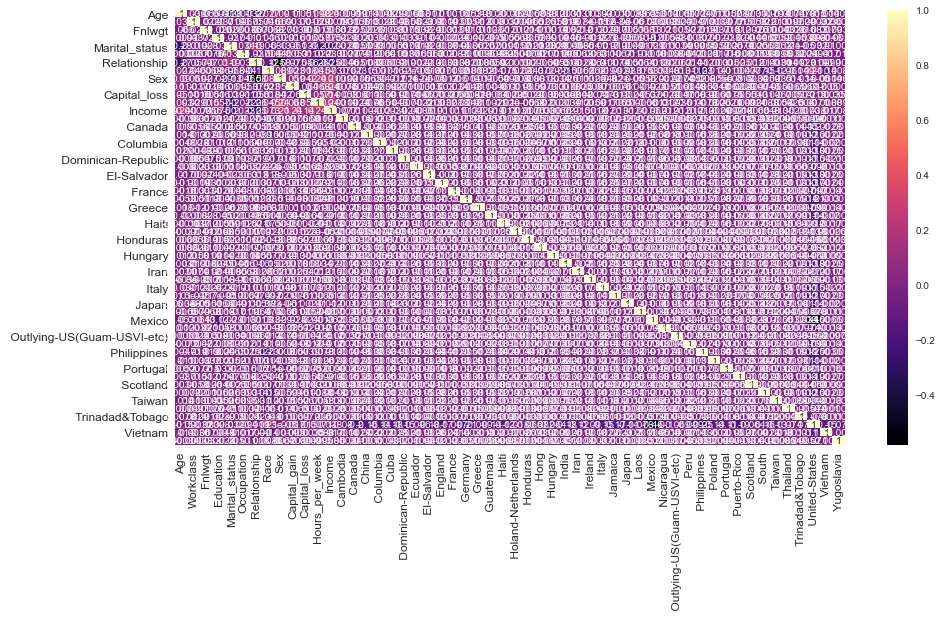

In [50]:
#Let's plot heatmap

plt.figure(figsize=(15,8))
sns.heatmap(data_new.corr(),annot=True,cmap='magma')
plt.tick_params(labelsize=12)

plt.show()

### Splitting features and labels

In [51]:
X = data_new.drop(columns = 'Income') #Features
Y = data_new['Income'] #Label

#### Balance the Imbalanced class

In [52]:
# Handiling the class having imbalance using SMOTE (Oversampling method)

from imblearn.over_sampling import SMOTE

sm=SMOTE()
X_over,Y_over = sm.fit_resample(X,Y)

In [53]:

round(Y_over.value_counts(normalize=True)*100,2).astype('str')+'%'

0    50.0%
1    50.0%
Name: Income, dtype: object

### Scaling the data

In [54]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

X_scaled = Scaler.fit_transform(X_over)

### Finding the Best Random State

In [55]:
from sklearn.linear_model import LogisticRegression

maxAccuracy = 0
maxAcc = 0

for i in range(200):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccuracy:
        maxAccuracy = acc
        maxAcc = i
        
print('The best accuracy is ',maxAccuracy, ' with Random State ',maxAcc)

The best accuracy is  0.7576923076923077  with Random State  50


### Splitting Training and Testing data

In [56]:
#TrainTestSplit
x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y_over,test_size = 0.20,random_state = maxAcc)

# Model Building

In [57]:
#Importing Libraries

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

### Model1: Logistic Regression

In [58]:
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train) #training the model
y_pred_log = Log_Reg.predict(x_test) #testing and predicting data

#Accuracy Score
print("Accuracy Score:",accuracy_score(y_test,y_pred_log))
A1 = accuracy_score(y_test,y_pred_log)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(Log_Reg,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean())
CV1 = cross_val_score(Log_Reg,X_scaled,Y_over,cv=5).mean()

Accuracy Score: 0.7576923076923077
Cross Validation Score:  [0.72120582 0.73648649 0.7527027  0.75600374 0.76296912]
Avg_Cross_Validation Score:  0.7458735753194636


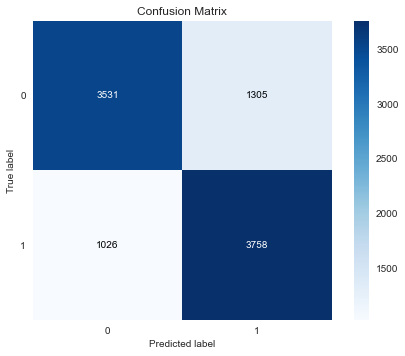

              precision    recall  f1-score   support

           0       0.77      0.73      0.75      4836
           1       0.74      0.79      0.76      4784

    accuracy                           0.76      9620
   macro avg       0.76      0.76      0.76      9620
weighted avg       0.76      0.76      0.76      9620



In [59]:
#Confusion_matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_log))

### Model2: Random Forest Classifier

In [60]:
Rand2 = RandomForestClassifier()
Rand2.fit(x_train,y_train) #training the model
y_pred_rand2 = Rand2.predict(x_test) #testing and predicting data

#Accuracy Score
A2 = accuracy_score(y_test,y_pred_rand2)

#Cross Validation Score
CV2 = cross_val_score(Rand2,X_scaled,Y_over,cv=5).mean()

In [61]:
#Accuracy Score
print("Accuracy Score:",A2)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(Rand2,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',CV2)

Accuracy Score: 0.8878378378378379
Cross Validation Score:  [0.84719335 0.87370062 0.90665281 0.90487577 0.90383616]
Avg_Cross_Validation Score:  0.8875636555249822


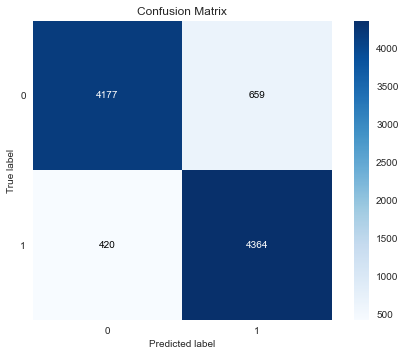

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      4836
           1       0.87      0.91      0.89      4784

    accuracy                           0.89      9620
   macro avg       0.89      0.89      0.89      9620
weighted avg       0.89      0.89      0.89      9620



In [62]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rand2)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_rand2))

### Model3: Decision Tree Classifier

In [63]:
dt = DecisionTreeClassifier() #calling the model
dt.fit(x_train,y_train) #training the model
y_pred_dt = dt.predict(x_test) #testing and predicting data

#Accuracy Score
A3 = accuracy_score(y_test,y_pred_dt)
print("Accuracy Score:",A3)


#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(dt,X_scaled,Y_over,cv=5))
CV3 = cross_val_score(dt,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV3)


Accuracy Score: 0.838981288981289
Cross Validation Score:  [0.8033264  0.82733888 0.85467775 0.85123194 0.8518557 ]
Avg_Cross_Validation Score:  0.8380395933291245


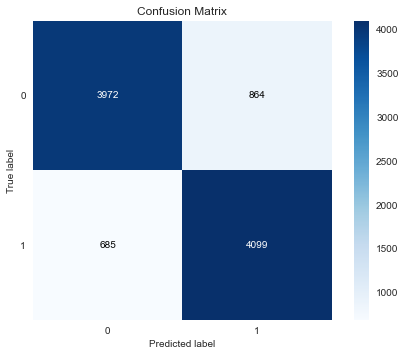

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      4836
           1       0.83      0.86      0.84      4784

    accuracy                           0.84      9620
   macro avg       0.84      0.84      0.84      9620
weighted avg       0.84      0.84      0.84      9620



In [64]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dt)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_dt))

### Model4: KNeighbors Classifier

In [65]:
knn=KNeighborsClassifier() #calling the model
knn.fit(x_train,y_train) #training the model
y_pred_knn = knn.predict(x_test) #testing and predicting data

#Accuracy Score
A4 = accuracy_score(y_test,y_pred_knn)
print("Acicuracy Score:",A4)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(knn,X_scaled,Y_over,cv=5))
CV4 = cross_val_score(knn,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV4)


Acicuracy Score: 0.8451143451143451
Cross Validation Score:  [0.7966736  0.82765073 0.85956341 0.86006861 0.86266764]
Avg_Cross_Validation Score:  0.8413247970114588


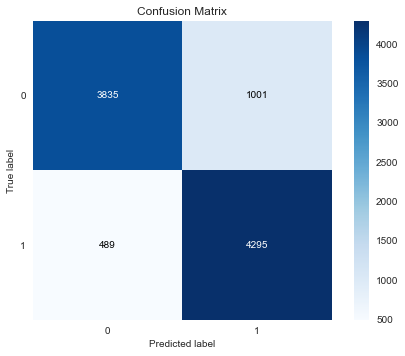

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      4836
           1       0.81      0.90      0.85      4784

    accuracy                           0.85      9620
   macro avg       0.85      0.85      0.84      9620
weighted avg       0.85      0.85      0.84      9620



In [66]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_knn)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_knn))

### Model5: AdaBoost Classifier

In [67]:
from sklearn.ensemble import AdaBoostClassifier

adb= AdaBoostClassifier() #calling the model
adb.fit(x_train,y_train)
y_pred_adb = adb.predict(x_test)

#Accuracy Score
A5 = accuracy_score(y_test,y_pred_adb)
print("Accuracy Score:",A5)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(adb,X_scaled,Y_over,cv=5))
CV5 = cross_val_score(adb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV5)


Accuracy Score: 0.8444906444906445
Cross Validation Score:  [0.80862786 0.83378378 0.84760915 0.85455869 0.85299927]
Avg_Cross_Validation Score:  0.8395157496457009


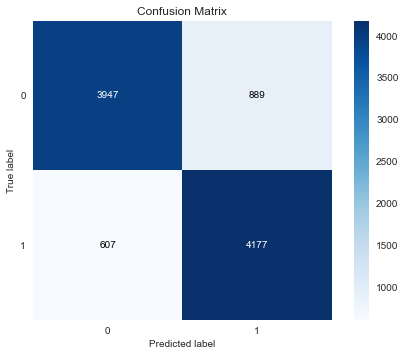

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      4836
           1       0.82      0.87      0.85      4784

    accuracy                           0.84      9620
   macro avg       0.85      0.84      0.84      9620
weighted avg       0.85      0.84      0.84      9620



In [68]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_adb)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_adb))

### Model6: SVC

In [69]:
from sklearn.svm import SVC

sv=SVC() #calling the model
sv.fit(x_train,y_train) #training the model
y_pred_sv = sv.predict(x_test) #testing and predicting data

#Accuracy Score
A6 = accuracy_score(y_test,y_pred_sv)
print("Accuracy Score:",A6)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(sv,X_scaled,Y_over,cv=5))
CV6 = cross_val_score(sv,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV6)


Accuracy Score: 0.8145530145530145
Cross Validation Score:  [0.77079002 0.7987526  0.82650728 0.82950411 0.835118  ]
Avg_Cross_Validation Score:  0.8121343996279021


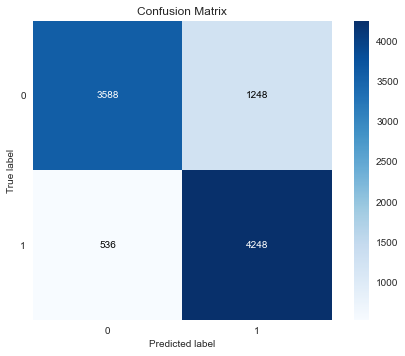

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      4836
           1       0.77      0.89      0.83      4784

    accuracy                           0.81      9620
   macro avg       0.82      0.81      0.81      9620
weighted avg       0.82      0.81      0.81      9620



In [70]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_sv)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_sv))

In [71]:
from sklearn.naive_bayes import BernoulliNB

nb=BernoulliNB() #calling the model
nb.fit(x_train,y_train) #training the model
y_pred_nb = nb.predict(x_test) #testing and predicting data

#Accuracy Score
A7 = accuracy_score(y_test,y_pred_nb)
print("Accuracy Score:",A7)

#Cross Validation Score
print("Cross Validation Score: ", cross_val_score(nb,X_scaled,Y_over,cv=5))
CV7 = cross_val_score(nb,X_scaled,Y_over,cv=5).mean()
print('Avg_Cross_Validation Score: ',CV7)

Accuracy Score: 0.7481288981288982
Cross Validation Score:  [0.72910603 0.74241164 0.74490644 0.74851856 0.74612746]
Avg_Cross_Validation Score:  0.7422140259046383


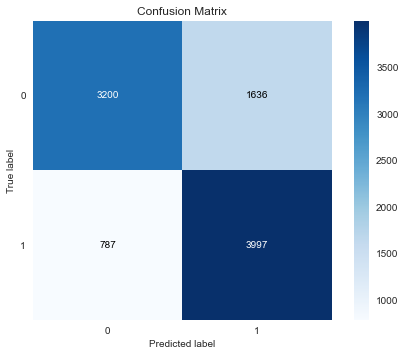

              precision    recall  f1-score   support

           0       0.80      0.66      0.73      4836
           1       0.71      0.84      0.77      4784

    accuracy                           0.75      9620
   macro avg       0.76      0.75      0.75      9620
weighted avg       0.76      0.75      0.75      9620



In [72]:
#confusion_matrix
skplt.metrics.plot_confusion_matrix(y_test,y_pred_nb)
plt.show()

#classification_report
print(classification_report(y_test,y_pred_nb))

____________

    Let's check for our Overall scores of our models:

In [73]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','Decision Tree',
                                       'KNeighbors Classifier','AdaBoost Classifier','SVC','BernoulliNB Classifier'],
                              'Accuracy_Score':[A1,A2,A3,A4,A5,A6,A7],
                              'Cross_Validation_Score':[CV1,CV2,CV3,CV4,CV5,CV6,CV7]})


Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [74]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.757692,0.745874,0.011819
1,Random Forest Classifier,0.887838,0.887564,0.000274
2,Decision Tree,0.838981,0.838040,0.000942
3,KNeighbors Classifier,0.845114,0.841325,0.003790
4,AdaBoost Classifier,0.844491,0.839516,0.004975
5,SVC,0.814553,0.812134,0.002419
6,BernoulliNB Classifier,0.748129,0.742214,0.005915


In [75]:
Overall_Score['Difference'].min()

0.0002741823128556975

In [79]:
Overall_Score[Overall_Score['Difference']==0.0002741823128556975]

,Model,Accuracy_Score,Cross_Validation_Score,Difference
1,Random Forest Classifier,0.887838,0.887564,0.000274


We have built many models, 
    
    But to choose the best model we checked the difference of the accuracy score and Cross Validation score
    And we found that the "Random Forest Classifier" has the minimum difference of "0.00066919919191466 %"

#### Hence, "Random Forest Classifier" is our best model

    Let's proceed further to increase our model accuracy

## Hyper Parameter Tuning

In [ ]:
#Importing library
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators': range(2,50,3),'criterion': ['entropy'],'max_depth': range(2,30,2),
            'max_features':['auto', 'sqrt']}

gridsearch=GridSearchCV(estimator=Rand2,param_grid=param_grid,cv=5)

gridsearch.fit(x_train,y_train)

In [77]:
print(gridsearch.best_score_, gridsearch.best_params_)

NameError: name 'gridsearch' is not defined

In [ ]:
Rand_final = RandomForestClassifier(n_estimators=, criterion = , max_depth = , max_features = , 
                                    class_weight = , max_leaf_nodes =)

Rand_final.fit(x_train,y_train)
y_pred = Rand_final.predict(x_test)

In [ ]:
,'max_leaf_nodes':range(2,30,2)

In [ ]:

import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a knn classifier after tuning. We'll generate probabilities on the test set.
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()

In [ ]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a knn classifier. We'll generate probabilities on the test set.
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_roc(y_test, probas)

plt.show()

## Saving the model for future prediction:

In [ ]:
import joblib
joblib.dump(KNN,'HR_Attrition_Prediction.obj')

In [ ]:
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print("Cross Validation Score: ", cross_val_score(KNN,X_scaled,Y_over,cv=5))
print('Avg_Cross_Validation Score: ',cross_val_score(KNN,X_scaled,Y_over,cv=5).mean())

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [ ]:
print(classification_report(y_test,y_pred))